In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.utils import np_utils

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [4]:
print(f"Formato x_train {x_train.shape}\nNumero de amostras de treino {x_train.shape[0]}\nNumero de amostras de teste {x_test.shape[0]}")

Formato x_train (60000, 28, 28, 1)
Numero de amostras de treino 60000
Numero de amostras de teste 10000


In [5]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
input_size = 784
hidden_size = 64
output_size = 784

x = Input(shape = (input_size,))
h = Dense(hidden_size, activation = "relu")(x)
r = Dense(output_size, activation = "sigmoid")(h)
autoencoder = Model(inputs = x, outputs = r)
autoencoder.compile(optimizer = "adam", loss = "mse") 

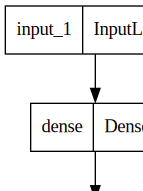

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog = "dot", format = "svg"))

In [8]:
epochs = 10

batch_size = 128

history = autoencoder.fit(
    x_train, x_train, 
    batch_size = batch_size, 
    epochs = epochs, 
    verbose = 1, 
    validation_data = (x_test, x_test))

Epoch 1/10


2023-03-16 20:36:00.254341: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 1s 1ms/step - loss: 0.0447 - val_loss: 0.0230
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0178 - val_loss: 0.0132
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0111 - val_loss: 0.0088
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0079 - val_loss: 0.0066
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 8/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 9/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 10/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0044 - val_loss: 0.0042


313/313 [==============================] - 0s 283us/step


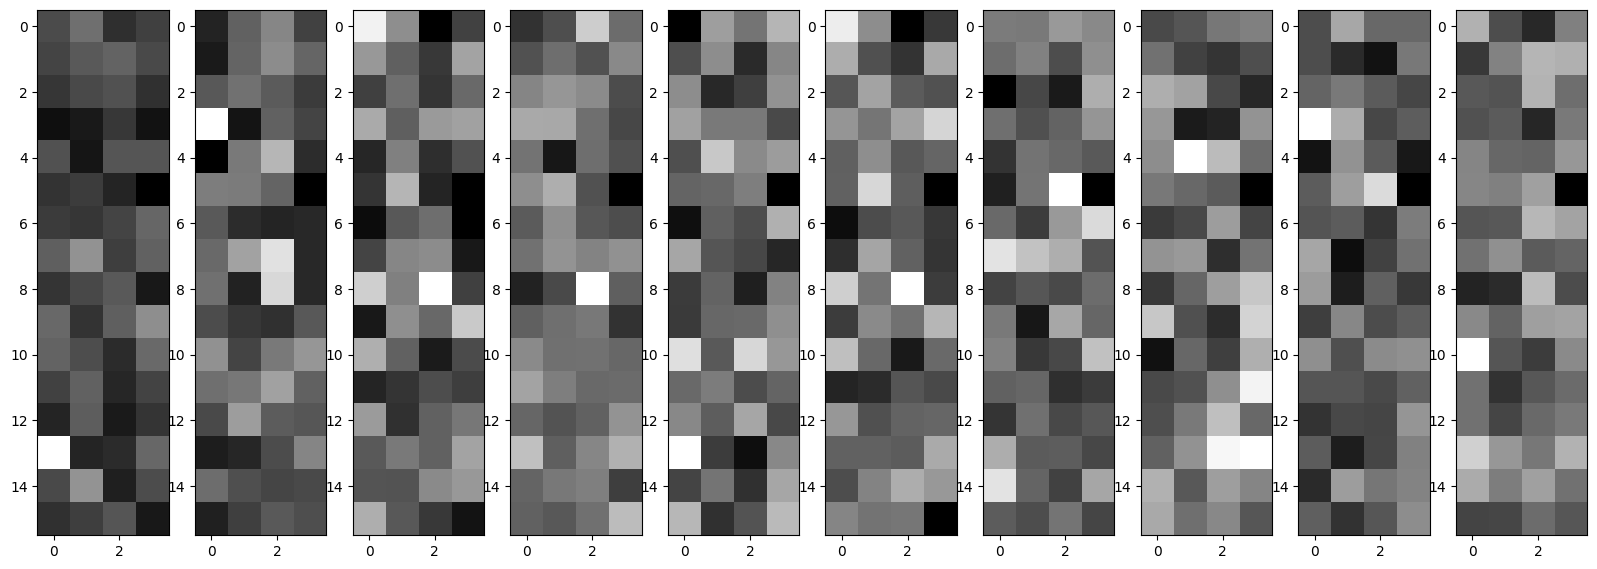

In [11]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(x_test)

n = 10

plt.figure(figsize = (20, 8))

for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4,16).T)
    plt.gray()

plt.show()

In [12]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 354us/step


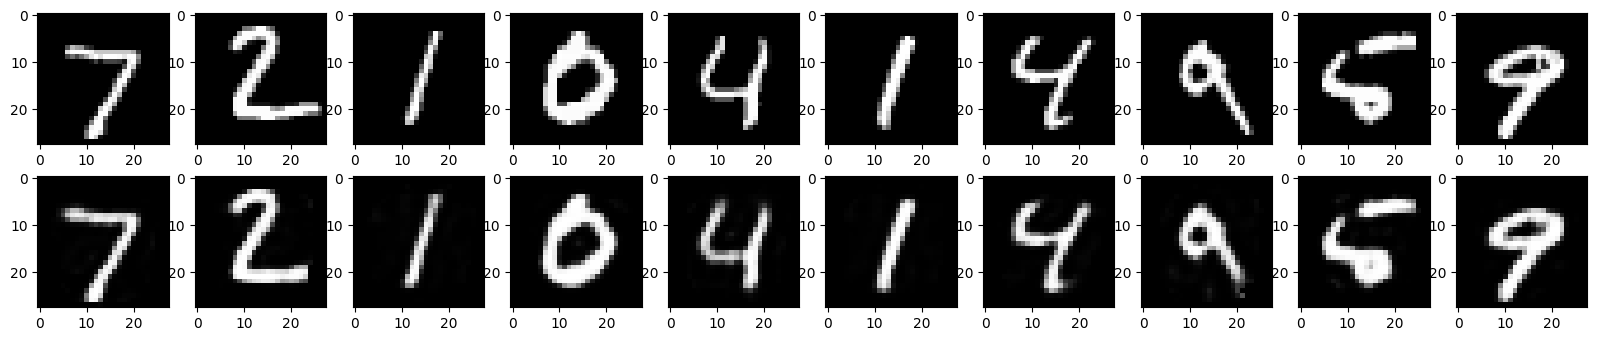

In [14]:
n = 10

plt.figure(figsize = (20,6))

for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()

    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()

plt.show()

In [15]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

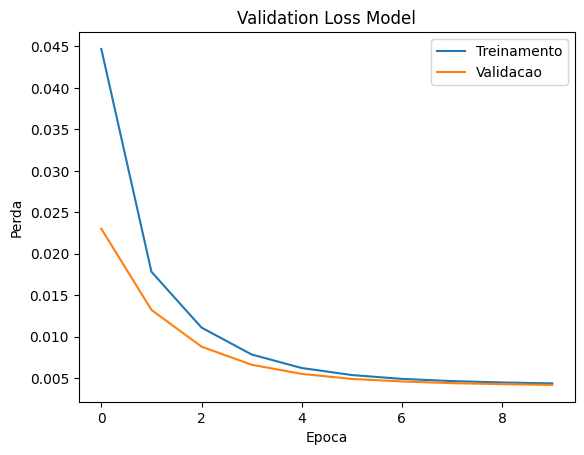

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Validation Loss Model")
plt.ylabel("Perda")
plt.xlabel("Epoca")

plt.legend(["Treinamento", "Validacao"], loc = "upper right");